In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 1. 데이터 로딩 및 탐색 (EDA)
문제 1. `/mnt/data/fintech_customer_value.csv`를 읽어 `df`라는 DataFrame으로 저장하세요.

문제 2. `df.head()`, `df.info()`, `df.describe()`를 출력하여 데이터 구조와 스케일을 파악하세요.
- 어떤 변수가 가장 큰 규모(숫자 범위)인가요? -> annual_fee_revenue 
- 결측치는 있나요? -> 없습니다.

문제 3. `df.corr()`로 상관행렬을 구하고, 어떤 설명변수가 `annual_fee_revenue`와 가장 강하게 상관되어 보이는지 적어보세요.
  (원하면 `sns.heatmap(df.corr(), annot=True)`로 시각화하세요.)
annual_fee_revenue 와 member_months가 강한 연관관계가 있다는것을 알 수 있습니다.

In [3]:
df = pd.read_csv("./data/16_fintech_customer_value.csv")

In [4]:
df.head()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
0,30.205960,11.922653,46.600535,17.898812,174.656875
1,36.094353,7.099605,41.168410,11.816718,194.571116
2,29.672607,17.151397,40.932152,11.039731,214.300409
3,30.056819,9.017350,27.084152,11.039861,148.825997
4,32.971027,11.899779,33.840879,32.529640,243.837602


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   avg_session_length   500 non-null    float64
 1   time_in_trading_app  500 non-null    float64
 2   time_in_support      500 non-null    float64
 3   member_months        500 non-null    float64
 4   annual_fee_revenue   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
df.describe()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.009569,12.024312,37.709936,14.895539,190.834223
std,3.347330,2.483366,5.947631,9.005692,32.509281
min,20.817169,4.821793,17.171421,0.244667,97.846402
25%,30.607236,10.376795,33.656514,8.349711,167.944455
50%,33.070575,12.151295,37.786059,13.139257,191.111933
75%,35.105510,13.766911,41.833011,19.321328,211.552593
max,43.377536,18.827168,54.295679,51.544382,284.522895


In [7]:
df.corr()

,avg_session_length,time_in_trading_app,time_in_support,member_months,annual_fee_revenue
avg_session_length,1.000000,-0.037000,0.014072,-0.030738,0.261994
time_in_trading_app,-0.037000,1.000000,0.005359,-0.001261,0.337332
time_in_support,0.014072,0.005359,1.000000,0.009225,-0.227180
member_months,-0.030738,-0.001261,0.009225,1.000000,0.621089
annual_fee_revenue,0.261994,0.337332,-0.227180,0.621089,1.000000


<Axes: >

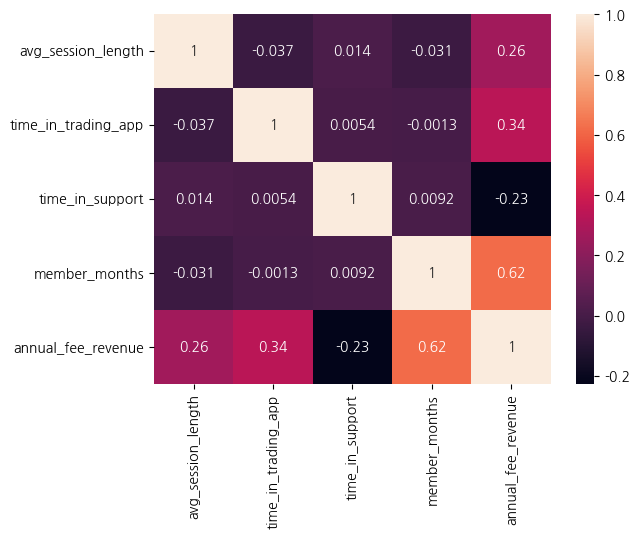

In [12]:
sns.heatmap(df.corr(),annot=True)

## 2. 단일 변수 회귀 (Simple Linear Regression)
먼저 하나의 설명변수만으로 `annual_fee_revenue`를 예측해 봅니다.
예를 들어 `member_months`만 사용한다고 가정해보세요.

문제 4. X로 `df[['member_months']]`, y로 `df['annual_fee_revenue']`를 준비하세요.
문제 5. `statsmodels.api`의 `OLS`를 사용해서 단순 선형회귀 모델을 적합하고 `summary()`를 출력하세요.
- 회귀계수, p-value, R-squared를 보고 해석을 메모하세요.

문제 6. 산점도(가로축=member_months, 세로축=annual_fee_revenue) 위에 예측 직선을 겹쳐서 시각화하세요.
  실제값이 직선 근처에 어느 정도 모이나요?
